# Sentiment Analysis on X (Twitter Data)

## Objective
The objective of this project is to analyze sentiments expressed on X (Twitter) posts using the VADER Sentiment Analyzer.  
The tweets are classified into Positive, Negative, and Neutral sentiments to understand overall public opinion.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk


In [2]:
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [3]:
# Load the dataset
df = pd.read_csv('/content/X data.csv')

# Display first 5 rows
df.head()


,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [4]:
# Check column names and data info
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162980 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162976 non-null  object 
 1   category    162973 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.5+ MB


In [5]:
# Initialize VADER Sentiment Analyzer
sid = SentimentIntensityAnalyzer()


In [6]:
# Get sentiment scores for each tweet
df['sentiment_score'] = df['clean_text'].apply(lambda x: sid.polarity_scores(str(x))['compound'])

# View result
df[['clean_text', 'sentiment_score']].head()


,clean_text,sentiment_score
0,when modi promised “minimum government maximum...,0.5267
1,talk all the nonsense and continue all the dra...,-0.4019
2,what did just say vote for modi welcome bjp t...,0.7096
3,asking his supporters prefix chowkidar their n...,-0.0713
4,answer who among these the most powerful world...,0.4754


In [7]:
# Convert sentiment score into labels
def get_sentiment(score):
    if score > 0.05:
        return 'Positive'
    elif score < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment'] = df['sentiment_score'].apply(get_sentiment)

# Check results
df[['clean_text', 'sentiment', 'sentiment_score']].head()


,clean_text,sentiment,sentiment_score
0,when modi promised “minimum government maximum...,Positive,0.5267
1,talk all the nonsense and continue all the dra...,Negative,-0.4019
2,what did just say vote for modi welcome bjp t...,Positive,0.7096
3,asking his supporters prefix chowkidar their n...,Negative,-0.0713
4,answer who among these the most powerful world...,Positive,0.4754


In [8]:
# Count sentiment categories
sentiment_counts = df['sentiment'].value_counts()

sentiment_counts


,count
sentiment,
Positive,76227
Negative,50935
Neutral,35818


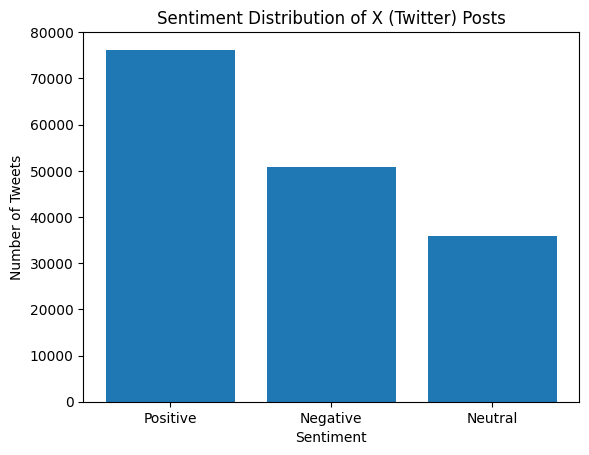

In [9]:
# Bar chart for sentiment distribution
plt.figure()
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.xlabel("Sentiment")
plt.ylabel("Number of Tweets")
plt.title("Sentiment Distribution of X (Twitter) Posts")
plt.show()


In [10]:
# Percentage distribution
sentiment_percent = (sentiment_counts / len(df)) * 100
sentiment_percent


,count
sentiment,
Positive,46.770769
Negative,31.252301
Neutral,21.976930


## Conclusion

Using the VADER Sentiment Analyzer, sentiments of X (Twitter) posts were classified into Positive, Negative, and Neutral categories.

The analysis shows that a significant portion of tweets fall under the Positive and Neutral categories, while Negative sentiments are comparatively lower. This indicates a mixed but generally balanced sentiment trend among users on the platform.

Such sentiment analysis can help understand public opinion and detect trends in social media discussions.
